In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/food11-image-dataset/validation/Fried food/208.jpg
/kaggle/input/food11-image-dataset/validation/Fried food/45.jpg
/kaggle/input/food11-image-dataset/validation/Fried food/56.jpg
/kaggle/input/food11-image-dataset/validation/Fried food/89.jpg
/kaggle/input/food11-image-dataset/validation/Fried food/20.jpg
/kaggle/input/food11-image-dataset/validation/Fried food/275.jpg
/kaggle/input/food11-image-dataset/validation/Fried food/212.jpg
/kaggle/input/food11-image-dataset/validation/Fried food/239.jpg
/kaggle/input/food11-image-dataset/validation/Fried food/58.jpg
/kaggle/input/food11-image-dataset/validation/Fried food/150.jpg
/kaggle/input/food11-image-dataset/validation/Fried food/6.jpg
/kaggle/input/food11-image-dataset/validation/Fried food/109.jpg
/kaggle/input/food11-image-dataset/validation/Fried food/149.jpg
/kaggle/input/food11-image-dataset/validation/Fried food/187.jpg
/kaggle/input/food11-image-dataset/validation/Fried food/76.jpg
/kaggle/input/food11-image-datase

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np 

# Define the dimensions of the input images
img_height = 150
img_width = 150

# Define the batch size (number of images to process in one forward/backward pass)
batch_size = 32

# Create an instance of ImageDataGenerator for data normalization
# Rescaling normalizes pixel values to the range [0, 1]
datagen = ImageDataGenerator(
    rescale=1./255  # Scale pixel values from [0, 255] to [0, 1]
)

# Set up the training data generator
# Loads images from the specified directory, resizes them, and normalizes pixel values
train_generator = datagen.flow_from_directory(
    directory='/kaggle/input/food11-image-dataset/training',  # Path to the training dataset directory
    target_size=(img_height, img_width),  # Resize images to the target size
    batch_size=batch_size,  # Number of images to return in each batch
    class_mode='categorical'  # Mode for labels: categorical (one-hot encoded)
)

# Set up the validation data generator
# Similar to training data generator but used for validation during training
validation_generator = datagen.flow_from_directory(
    directory='/kaggle/input/food11-image-dataset/validation',  # Path to the validation dataset directory
    target_size=(img_height, img_width),  # Resize images to the target size
    batch_size=batch_size,  # Number of images to return in each batch
    class_mode='categorical'  # Mode for labels: categorical (one-hot encoded)
)

# Set up the evaluation data generator
# Used to evaluate the model's performance after training
evaluation_generator = datagen.flow_from_directory(
    directory='/kaggle/input/food11-image-dataset/evaluation',  # Path to the evaluation dataset directory
    target_size=(img_height, img_width),  # Resize images to the target size
    batch_size=batch_size,  # Number of images to return in each batch
    class_mode='categorical'  # Mode for labels: categorical (one-hot encoded)
)


Found 9866 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.
Found 3347 images belonging to 11 classes.


In [31]:
from tensorflow.keras import datasets, layers, models, Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

# Build the CNN model
model = Sequential()

# Convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
model.add(Conv2D(32, kernel_size=3, input_shape=(img_height, img_width, 3), activation='relu'))
# Max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer with 64 filters, 3x3 kernel, and ReLU activation
model.add(Conv2D(64, kernel_size=3, activation='relu'))
# Max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer with 128 filters, 3x3 kernel, and ReLU activation
model.add(Conv2D(128, kernel_size=3, activation='relu'))
# Max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer with 256 filters, 3x3 kernel, and ReLU activation
model.add(Conv2D(256, kernel_size=3, activation='relu'))
# Max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D output to 1D
model.add(Flatten())

# Fully connected layer with 512 units and ReLU activation
model.add(Dense(512, activation='relu'))

# Output layer with 11 units for classification, softmax activation
model.add(Dense(11, activation='softmax'))


In [32]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size ,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples 
)

Epoch 1/15
308/308 ━━━━━━━━━━━━━━━━━━━━ 316s 1s/step - accuracy: 0.1979 - loss: 2.2324 - val_accuracy: 0.3335 - val_loss: 1.9067
Epoch 2/15
308/308 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step - accuracy: 0.2812 - loss: 2.0280 - val_accuracy: 0.3496 - val_loss: 1.8498
Epoch 3/15
308/308 ━━━━━━━━━━━━━━━━━━━━ 321s 1s/step - accuracy: 0.3924 - loss: 1.7624 - val_accuracy: 0.4283 - val_loss: 1.6464
Epoch 4/15
308/308 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step - accuracy: 0.2812 - loss: 2.0655 - val_accuracy: 0.4405 - val_loss: 1.6154
Epoch 5/15
308/308 ━━━━━━━━━━━━━━━━━━━━ 312s 1s/step - accuracy: 0.4704 - loss: 1.5415 - val_accuracy: 0.4653 - val_loss: 1.5295
Epoch 6/15
308/308 ━━━━━━━━━━━━━━━━━━━━ 42s 133ms/step - accuracy: 0.5312 - loss: 1.3849 - val_accuracy: 0.4741 - val_loss: 1.5198
Epoch 7/15
308/308 ━━━━━━━━━━━━━━━━━━━━ 309s 1s/step - accuracy: 0.5516 - loss: 1.2976 - val_accuracy: 0.4758 - val_loss: 1.5023
Epoch 8/15
308/308 ━━━━━━━━━━━━━━━━━━━━ 34s 107ms/step - accuracy: 0.4375 - loss: 1.6544 - 

104/104 ━━━━━━━━━━━━━━━━━━━━ 32s 305ms/step - accuracy: 0.1782 - loss: 2.2821
Test Loss: 2.2766
Test Accuracy: 0.1878


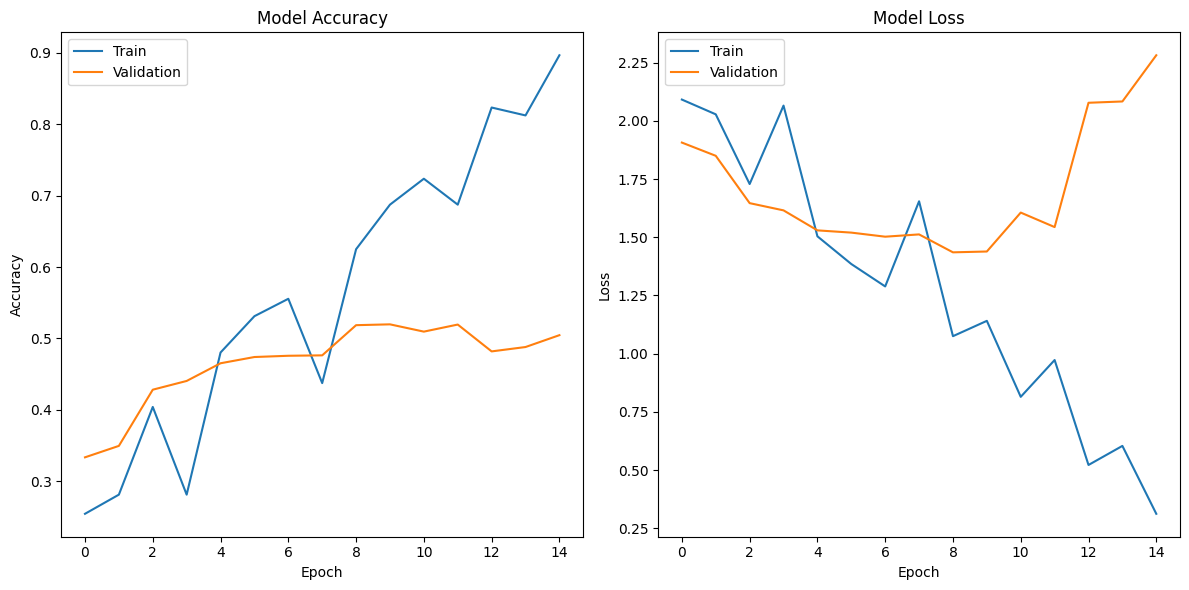

saved


In [40]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(evaluation_validation, steps=evaluation_validation.samples//batch_size)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot training & validation accuracy values
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

# Save the model 
model.save('/kaggle/working/food_classification_model.h5')
print ('saved')
